In [82]:

## Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [50]:
## Data Loading
df = pd.read_csv("digital_diet_mental_health.csv")
df.head()

## Initial Data Exploration

print(df.shape)



(2000, 25)


In [85]:
df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,mental_health_level,mental_health_level_encoded
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,Urban,32,1,1,125.2,13,15,4.0,Medium,2
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,Suburban,75,0,1,150.4,19,18,6.5,High,0
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,Suburban,22,0,0,187.9,7,3,6.9,Low,1
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,Rural,22,0,1,73.6,7,2,4.8,Low,1
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,Urban,64,1,1,217.5,8,10,0.0,Medium,2


In [52]:
## Check for missing values and data types
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

user_id                             0
age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
location_type                       0
mental_health_score                 0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
dtype: int64

In [53]:
## Statistical summary of numeric features
df.describe()



,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,38.805500,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,...,5.591000,5.541500,3.087150,49.650500,0.387500,0.507500,148.07970,9.887500,10.04900,10.753750
std,14.929203,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,...,2.899814,2.885731,1.885258,17.546717,0.487301,0.500069,48.86066,6.027853,6.05334,7.340269
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,...,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.80000,0.000000,0.00000,0.000000
25%,26.000000,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,...,3.000000,3.000000,1.600000,35.000000,0.000000,0.000000,113.90000,5.000000,5.00000,4.900000
50%,39.000000,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,...,6.000000,6.000000,3.000000,49.000000,0.000000,1.000000,147.45000,10.000000,10.00000,10.400000
75%,51.000000,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,...,8.000000,8.000000,4.400000,64.250000,1.000000,1.000000,180.70000,15.000000,15.00000,15.800000
max,64.000000,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,...,10.000000,10.000000,9.700000,80.000000,1.000000,1.000000,364.90000,20.000000,20.00000,36.400000


In [54]:
## Feature and Target Separation

target_column = "mental_health_score"

target_column = "mental_health_score"
y = df[target_column]

# Prepare feature matrix X by dropping target column and any identifier columns
X = df.drop(columns=[target_column, "user_id"])

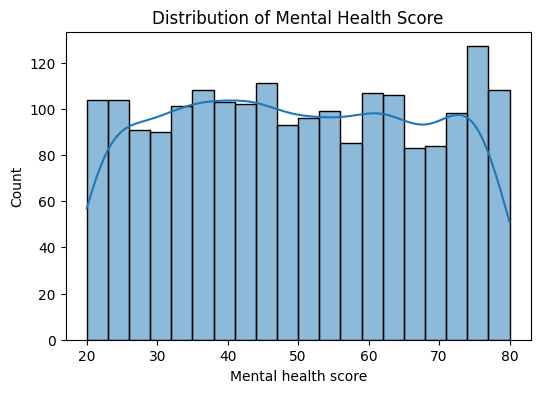

In [55]:
## Visualize distribution of mental health score (Target variable)
plt.figure(figsize=(6,4))
sns.histplot(df["mental_health_score"], bins=20, kde=True)
plt.title("Distribution of Mental Health Score")
plt.xlabel("Mental health score")
plt.ylabel("Count")
plt.show()


In [89]:
## Identify numeric and categorical features

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print ("Numeric features:", numeric_features)
print ("Categorical features:", categorical_features)

Numeric features: ['age', 'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level', 'physical_activity_hours_per_week', 'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day', 'weekly_anxiety_score', 'weekly_depression_score', 'mindfulness_minutes_per_day']
Categorical features: ['gender', 'location_type']


In [87]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [88]:
## One-hot encoding
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=categorical_features, drop_first=True)

In [58]:
## Ensure Encoding Consistency has been done correctly
print(X_train.columns)
print(X_test.columns)


Index(['age', 'daily_screen_time_hours', 'phone_usage_hours',
       'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours',
       'social_media_hours', 'work_related_hours', 'entertainment_hours',
       'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating',
       'stress_level', 'physical_activity_hours_per_week',
       'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day',
       'weekly_anxiety_score', 'weekly_depression_score',
       'mindfulness_minutes_per_day', 'gender_Male', 'gender_Other',
       'location_type_Suburban', 'location_type_Urban'],
      dtype='object')
Index(['age', 'daily_screen_time_hours', 'phone_usage_hours',
       'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours',
       'social_media_hours', 'work_related_hours', 'entertainment_hours',
       'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 'mood_rating',
       'stress_level', 'physical_activity_hours_per_week',
       'uses_wellness_apps', 'eat

In [59]:
## Align columns to have the same columns i n both train and test sets
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [60]:
## Base XGBoost Model
xgb_base = XGBRegressor(
    objective="reg:squarederror",   ## MSE loss function
    tree_method="hist",             ## histogram binning
    random_state=42,                ## reproducibility
    n_jobs=-1                       ## use of all CPU cores
)




In [61]:
## Hyperparameter Tuning with RandomizedSearchCV
param_dist = {
    "n_estimators":     randint(200, 800),     ## Numer of trees
    "max_depth":        randint(2, 8),         ## Depth of each tree
    "learning_rate":    uniform(0.01, 0.15),   ## Step size shrinkage
    "subsample":        uniform(0.6, 0.4),     ## Fraction of samples for each tree
    "colsample_bytree": uniform(0.6, 0.4),     ## Fraction of features for each tree
    "reg_lambda":       uniform(0.0, 10.0),    ## L2
    "reg_alpha":        uniform(0.0, 5.0),     ## L1
    "min_child_weight": randint(1, 8)
}



In [62]:
## Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [63]:
## Randomized Search CV
search = RandomizedSearchCV(
    estimator=xgb_base,                     ## Base model
    param_distributions=param_dist,         ## Hyperparameter distributions
    n_iter=40,                              ## Number of parameter settings sampled
    scoring="neg_root_mean_squared_error",  ## Scoring metric
    cv=cv,                                  ## Cross-validation strategy
    n_jobs=-1,                              ## Use all CPU cores
    verbose=2,                              ## Verbosity level
    random_state=42,                        ## Reproducibility
    refit=True,                             ## Refit the best model on the whole dataset
)


In [64]:
## Fit RandomizedSearchCV
search.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....002868C79D150>, 'learning_rate': <scipy.stats....002868C79C6A0>, 'max_depth': <scipy.stats....002868C68FDC0>, 'min_child_weight': <scipy.stats....002868C6E7400>, ...}"
,n_iter,40
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [65]:
## Results

print("\nBest CV score:", search.best_score_)
print("Best params:")
for k, v in search.best_params_.items():
    print(f"  {k}: {v}")

## Best Estimator
best_xgb = search.best_estimator_



Best CV score: -17.986568450927734
Best params:
  colsample_bytree: 0.8143098736299034
  learning_rate: 0.023543465508161245
  max_depth: 2
  min_child_weight: 1
  n_estimators: 323
  reg_alpha: 2.5409938837035932
  reg_lambda: 6.958128067908818
  subsample: 0.943343521925488


In [66]:
## Evaluation on Test Set
y_pred_xgb = best_xgb.predict(X_test)

## Metrics Calculation

xgb_mae  = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = root_mean_squared_error(y_test, y_pred_xgb)
xgb_r2   = r2_score(y_test, y_pred_xgb)

print("\nXGBoost (best from RandomizedSearchCV):")
print(f"MAE  : {xgb_mae:.3f}")
print(f"RMSE : {xgb_rmse:.3f}")
print(f"R²   : {xgb_r2:.3f}")



XGBoost (best from RandomizedSearchCV):
MAE  : 15.433
RMSE : 17.847
R²   : -0.026


I used XGBoost because it is one of the strongest gradient boosting models and usually performs very well on tabular data. However, in this project the results were still poor. Even after hyperparameter tuning, the performance barely changed: the R² score stayed negative, which means the model predicts worse than simply using the average mental health score.

This suggests that the issue is not with XGBoost itself, but with the dataset. The Kaggle dataset appears synthetic and does not contain strong or consistent patterns that would allow the model to make reliable predictions

However, we can use XGBoost to check which factors most strongly influence mental health:


Top 15 features (XGBoost):
sleep_quality                       0.059554
tv_usage_hours                      0.050810
phone_usage_hours                   0.050510
gaming_hours                        0.049516
gender_Male                         0.049309
caffeine_intake_mg_per_day          0.049203
tablet_usage_hours                  0.049070
uses_wellness_apps                  0.047132
mindfulness_minutes_per_day         0.045708
physical_activity_hours_per_week    0.045006
weekly_depression_score             0.043468
mood_rating                         0.043302
daily_screen_time_hours             0.041193
social_media_hours                  0.040391
work_related_hours                  0.039727
dtype: float32


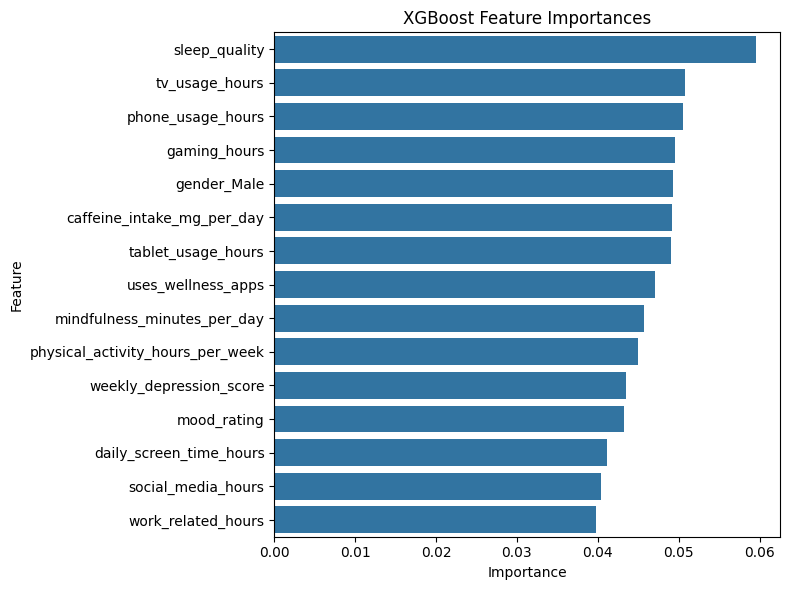

In [67]:
## Feature Importance Analysis

## Extract feature importances
xgb_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)

## Sort importances
xgb_importances = xgb_importances.sort_values(ascending=False)

print("\nTop 15 features (XGBoost):")
print(xgb_importances.head(15))

# Plotting Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x=xgb_importances.head(15), y=xgb_importances.head(15).index)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [68]:
## Additional Models: Linear Regression, Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_mae  = mean_absolute_error(y_test, lr_pred)
lr_rmse = root_mean_squared_error(y_test, lr_pred)
lr_r2   = r2_score(y_test, lr_pred)

print("\nLinear Regression:")
print(f"MAE  : {lr_mae:.3f}")
print(f"RMSE : {lr_rmse:.3f}")
print(f"R²   : {lr_r2:.3f}")




Linear Regression:
MAE  : 15.328
RMSE : 17.758
R²   : -0.016


In [69]:
##  Ridge Regression (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_mae  = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
ridge_r2   = r2_score(y_test, ridge_pred)

print("\n Ridge Regression: (L2):")
print(f"MAE  : {ridge_mae:.3f}")
print(f"RMSE : {ridge_rmse:.3f}")
print(f"R²   : {ridge_r2:.3f}")


 Ridge Regression: (L2):
MAE  : 15.328
RMSE : 17.758
R²   : -0.015


In [70]:
## Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso_mae  = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_r2   = r2_score(y_test, lasso_pred)

print("\nLasso Regression(L1):")
print(f"MAE  : {lasso_mae:.3f}")
print(f"RMSE : {lasso_rmse:.3f}")
print(f"R²   : {lasso_r2:.3f}")


Lasso Regression(L1):
MAE  : 15.315
RMSE : 17.745
R²   : -0.014


I was also interested to see whether screen time generally correlate with worse mental well-being:

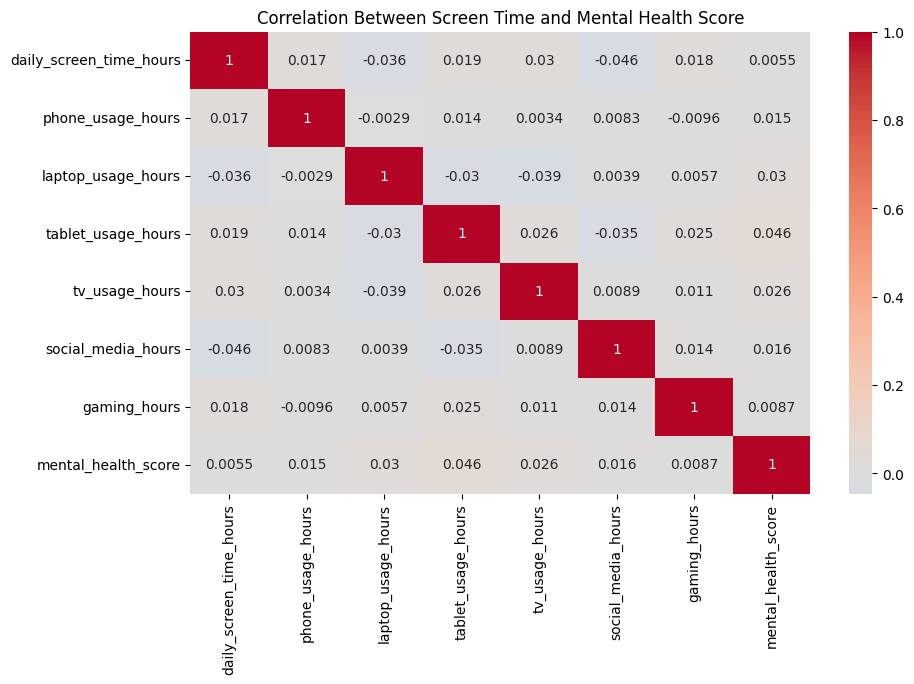

In [71]:
## Correlation Analysis

screen_cols = [
    "daily_screen_time_hours", "phone_usage_hours", "laptop_usage_hours",
    "tablet_usage_hours", "tv_usage_hours", "social_media_hours", "gaming_hours"
]

corr = df[screen_cols + ["mental_health_score"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Screen Time and Mental Health Score")
plt.show()

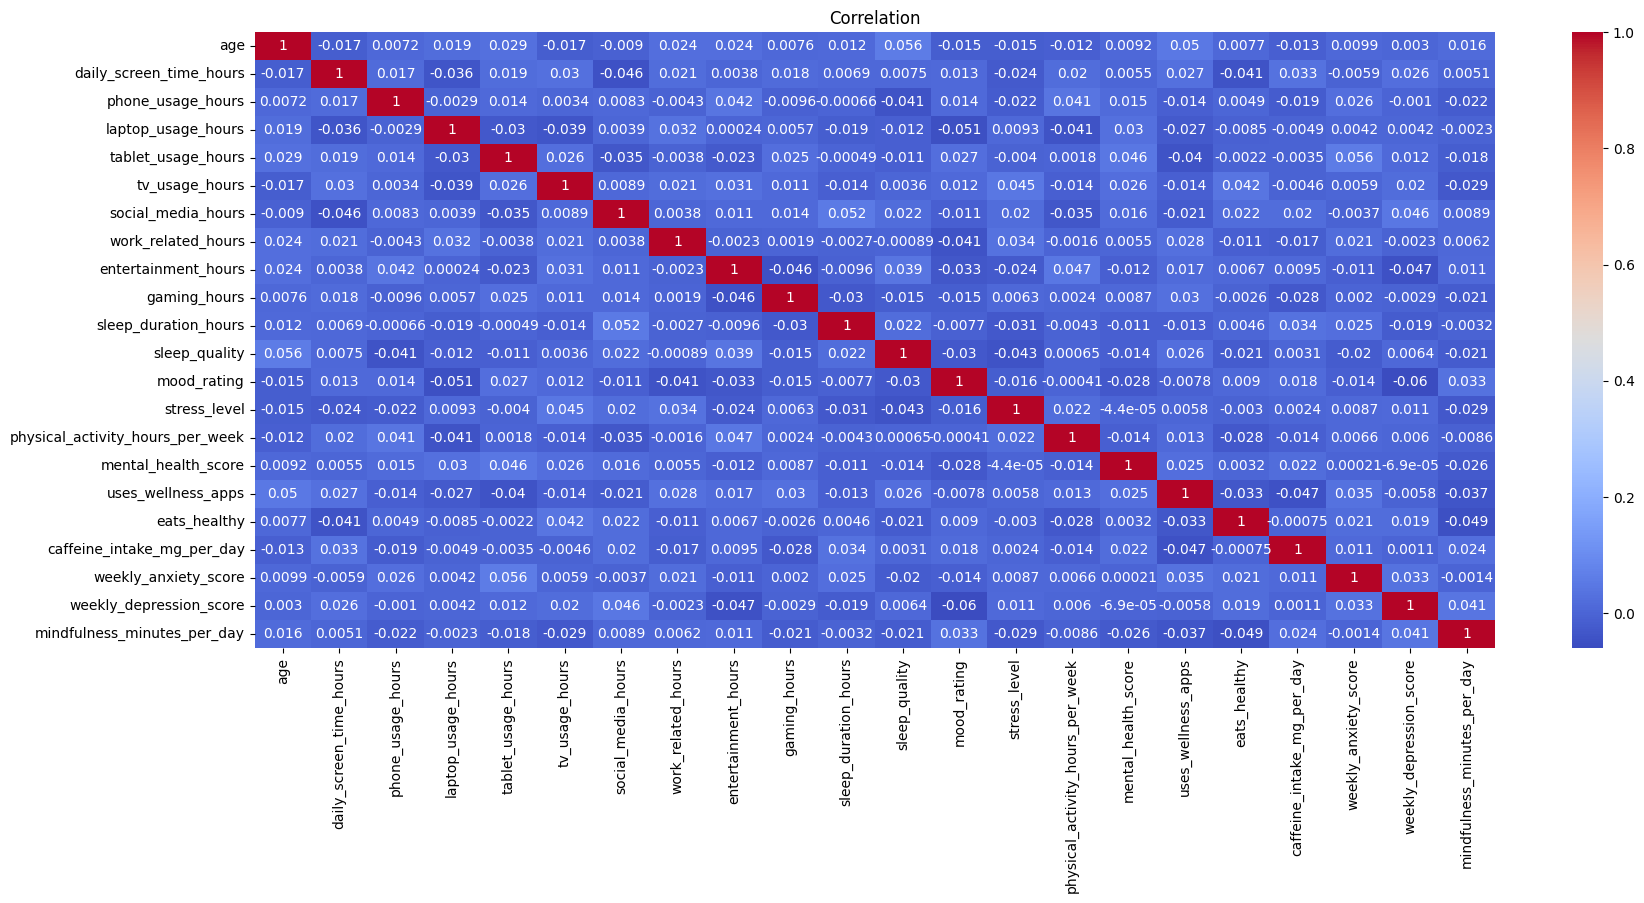

In [72]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

It is able to be observed that there is almost no high correlation between screen time variables and mental health score (meaning, the relationships are not linear).

It leads us to the conclusion that no screen time consistently predict better or worse mental health, and it actually supports the reslts from XGBoost, Linaer Regression, Lasso Regression, and Ridge Regression: there are no strong stable patterns in data, and it probably goes from the dataset. As there is no meaningful results, I am trying different approach: converting the problem into a classification task (Low / Medium / High mental health). By doing this, we reduce the complexity of the prediction. 

In [ ]:
##  CLASSIFICATION: mental_health_score to Low/Medium/High

## Create class labels from score

def classify_score(score: float) -> str:
    if score < 30:
        return "Low"
    elif score < 70:
        return "Medium"
    else:
        return "High"

df["mental_health_level"] = df["mental_health_score"].apply(classify_score)

In [74]:
##  Class distribution
print("Class distribution:")
print(df["mental_health_level"].value_counts())
print("\nClass distribution (share):")
print(df["mental_health_level"].value_counts(normalize=True).round(3))

Class distribution:
mental_health_level
Medium    1313
High       361
Low        326
Name: count, dtype: int64

Class distribution (share):
mental_health_level
Medium    0.656
High      0.180
Low       0.163
Name: proportion, dtype: float64


In [75]:
## Encode class labels

le_class = LabelEncoder()
df["mental_health_level_encoded"] = le_class.fit_transform(df["mental_health_level"])

In [76]:
## Building feature matrix X (avoiding leakage)
## Keep numeric columns only (simple baseline)
## Drop: original score + class label + encoded class

drop_cols_class = ["mental_health_score", "mental_health_level", "mental_health_level_encoded", "user_id"]


In [77]:
## Build feature matrix X and target y for classification

X_class = df.select_dtypes(include=["number"]).drop(columns=drop_cols_class, errors="ignore")
y_class = df["mental_health_level_encoded"]

In [78]:
## Shapes of classification feature matrix and target vector

print("\nX_class shape:", X_class.shape)
print("y_class shape:", y_class.shape)


X_class shape: (2000, 21)
y_class shape: (2000,)


In [79]:
## Train/test split (stratified)

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

In [83]:
## Train Random Forest classifier

rf_class = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"  ## helps if classes are imbalanced
)

rf_class.fit(X_class_train, y_class_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Classification Report (Random Forest)
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        72
         Low       0.00      0.00      0.00        65
      Medium       0.66      1.00      0.79       263

    accuracy                           0.66       400
   macro avg       0.22      0.33      0.26       400
weighted avg       0.43      0.66      0.52       400



c:\Users\User\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


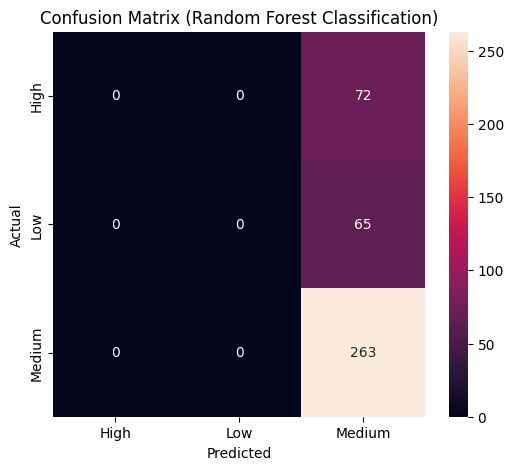

In [84]:
## Evaluate

y_class_pred = rf_class.predict(X_class_test)

print("\nClassification Report (Random Forest)")
print(classification_report(
    y_class_test,
    y_class_pred,
    target_names=le_class.classes_
))

cm = confusion_matrix(y_class_test, y_class_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le_class.classes_,
            yticklabels=le_class.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest Classification)")
plt.show()
